In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [27]:
# Specifică calea către fișierul CSV
file_path = '/Users/octaviodaniel/Desktop/SBC/4 - Automated Greenhouse Climate Control/ProjectSBC/data/IoTProcessed_Data.csv'

# Încărcarea datelor
df = pd.read_csv(file_path)

# Conversia coloanei 'date' la tip datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Eliminarea rândurilor cu valori lipsă și a duplicatelor
df = df.dropna().drop_duplicates().reset_index(drop=True)

# Sortarea datelor după 'date'
df = df.sort_values('date').reset_index(drop=True)

# Verificarea consistenței pentru coloanele N, P, K
valid_range = (0, 255)
for col in ['N', 'P', 'K']:
    if df[col].min() < valid_range[0] or df[col].max() > valid_range[1]:
        df = df[(df[col] >= valid_range[0]) & (df[col] <= valid_range[1])]

# Funcție pentru eliminarea outlier-urilor folosind metoda IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicarea funcției pentru fiecare coloană de interes
for col in ['temperature', 'humidity', 'N', 'P', 'K']:
    df = remove_outliers(df, col)

# Calcularea și afișarea statisticilor descriptive, skewness și kurtosis
desc = df[['temperature', 'humidity', 'N', 'P', 'K']].describe()
print(desc)
for col in ['temperature', 'humidity', 'N', 'P', 'K']:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")

# Salvarea datasetului preprocesat
df.to_csv("preprocessed_greenhouse_data.csv", index=False)


        temperature      humidity             N             P             K
count  30327.000000  30327.000000  30327.000000  30327.000000  30327.000000
mean      18.275002     59.440235    229.585782    231.936855    222.006232
std        6.898656      7.837770     35.489520     32.180644     46.020349
min        3.000000     30.000000    140.000000    158.000000    150.000000
25%       13.000000     58.000000    183.000000    187.000000    158.000000
50%       16.000000     60.000000    255.000000    255.000000    255.000000
75%       23.000000     63.000000    255.000000    255.000000    255.000000
max       41.000000     81.000000    255.000000    255.000000    255.000000
temperature: Skewness = 0.54, Kurtosis = -0.61
humidity: Skewness = -1.18, Kurtosis = 2.51
N: Skewness = -0.69, Kurtosis = -1.52
P: Skewness = -0.68, Kurtosis = -1.53
K: Skewness = -0.68, Kurtosis = -1.54


In [28]:
# Definirea intervalului de date
start_date = '2024-01-01'
end_date = '2024-01-07'

# Filtrarea datelor pentru intervalul specificat
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df_week = df.loc[mask].reset_index(drop=True)

# Verificarea dacă există date în perioada selectată
if df_week.empty:
    print("Nu există date pentru perioada selectată.")
else:
    print(f"Numărul de rânduri din perioada {start_date} - {end_date}: {df_week.shape[0]}")
    print(df_week.head())


Numărul de rânduri din perioada 2024-01-01 - 2024-01-07: 1877
                 date  temperature  humidity  water_level    N    P    K  \
0 2024-01-01 00:01:00           19        70           85  178  186  157   
1 2024-01-01 00:06:00           21        69           81  178  186  157   
2 2024-01-01 00:11:00           22        68           93  178  186  157   
3 2024-01-01 00:16:00           23        71           94  178  186  157   
4 2024-01-01 00:21:00           23        67           97  178  186  157   

   Fan_actuator_OFF  Fan_actuator_ON  Watering_plant_pump_OFF  \
0               1.0              0.0                      1.0   
1               1.0              0.0                      1.0   
2               1.0              0.0                      1.0   
3               0.0              1.0                      1.0   
4               0.0              1.0                      1.0   

   Watering_plant_pump_ON  Water_pump_actuator_OFF  Water_pump_actuator_ON  
0            

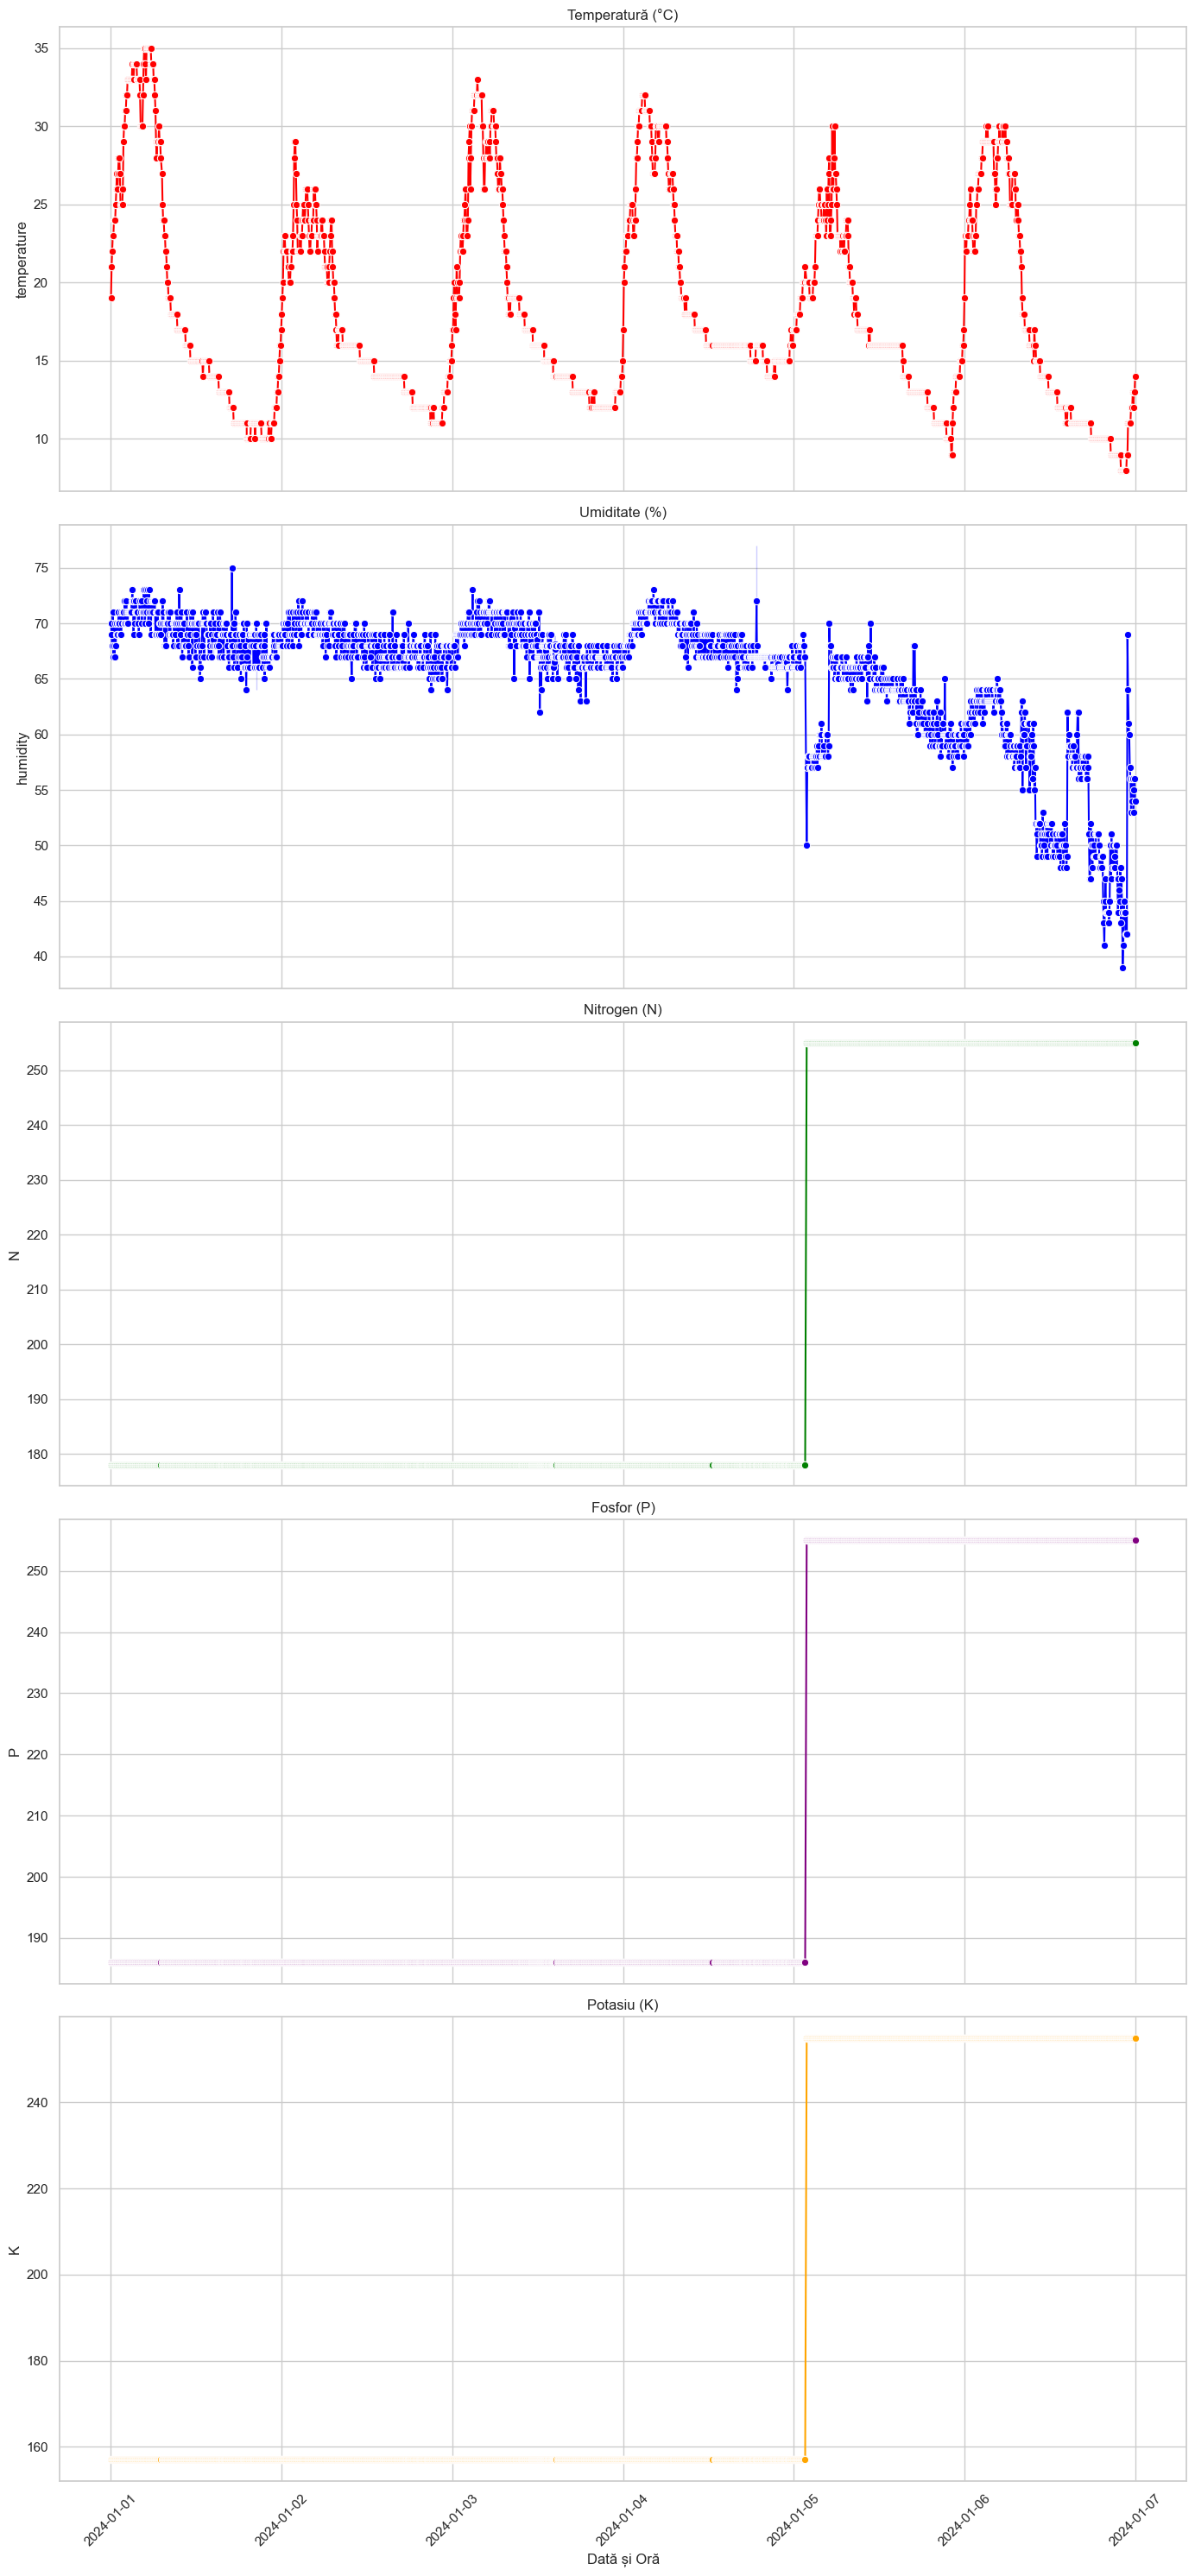

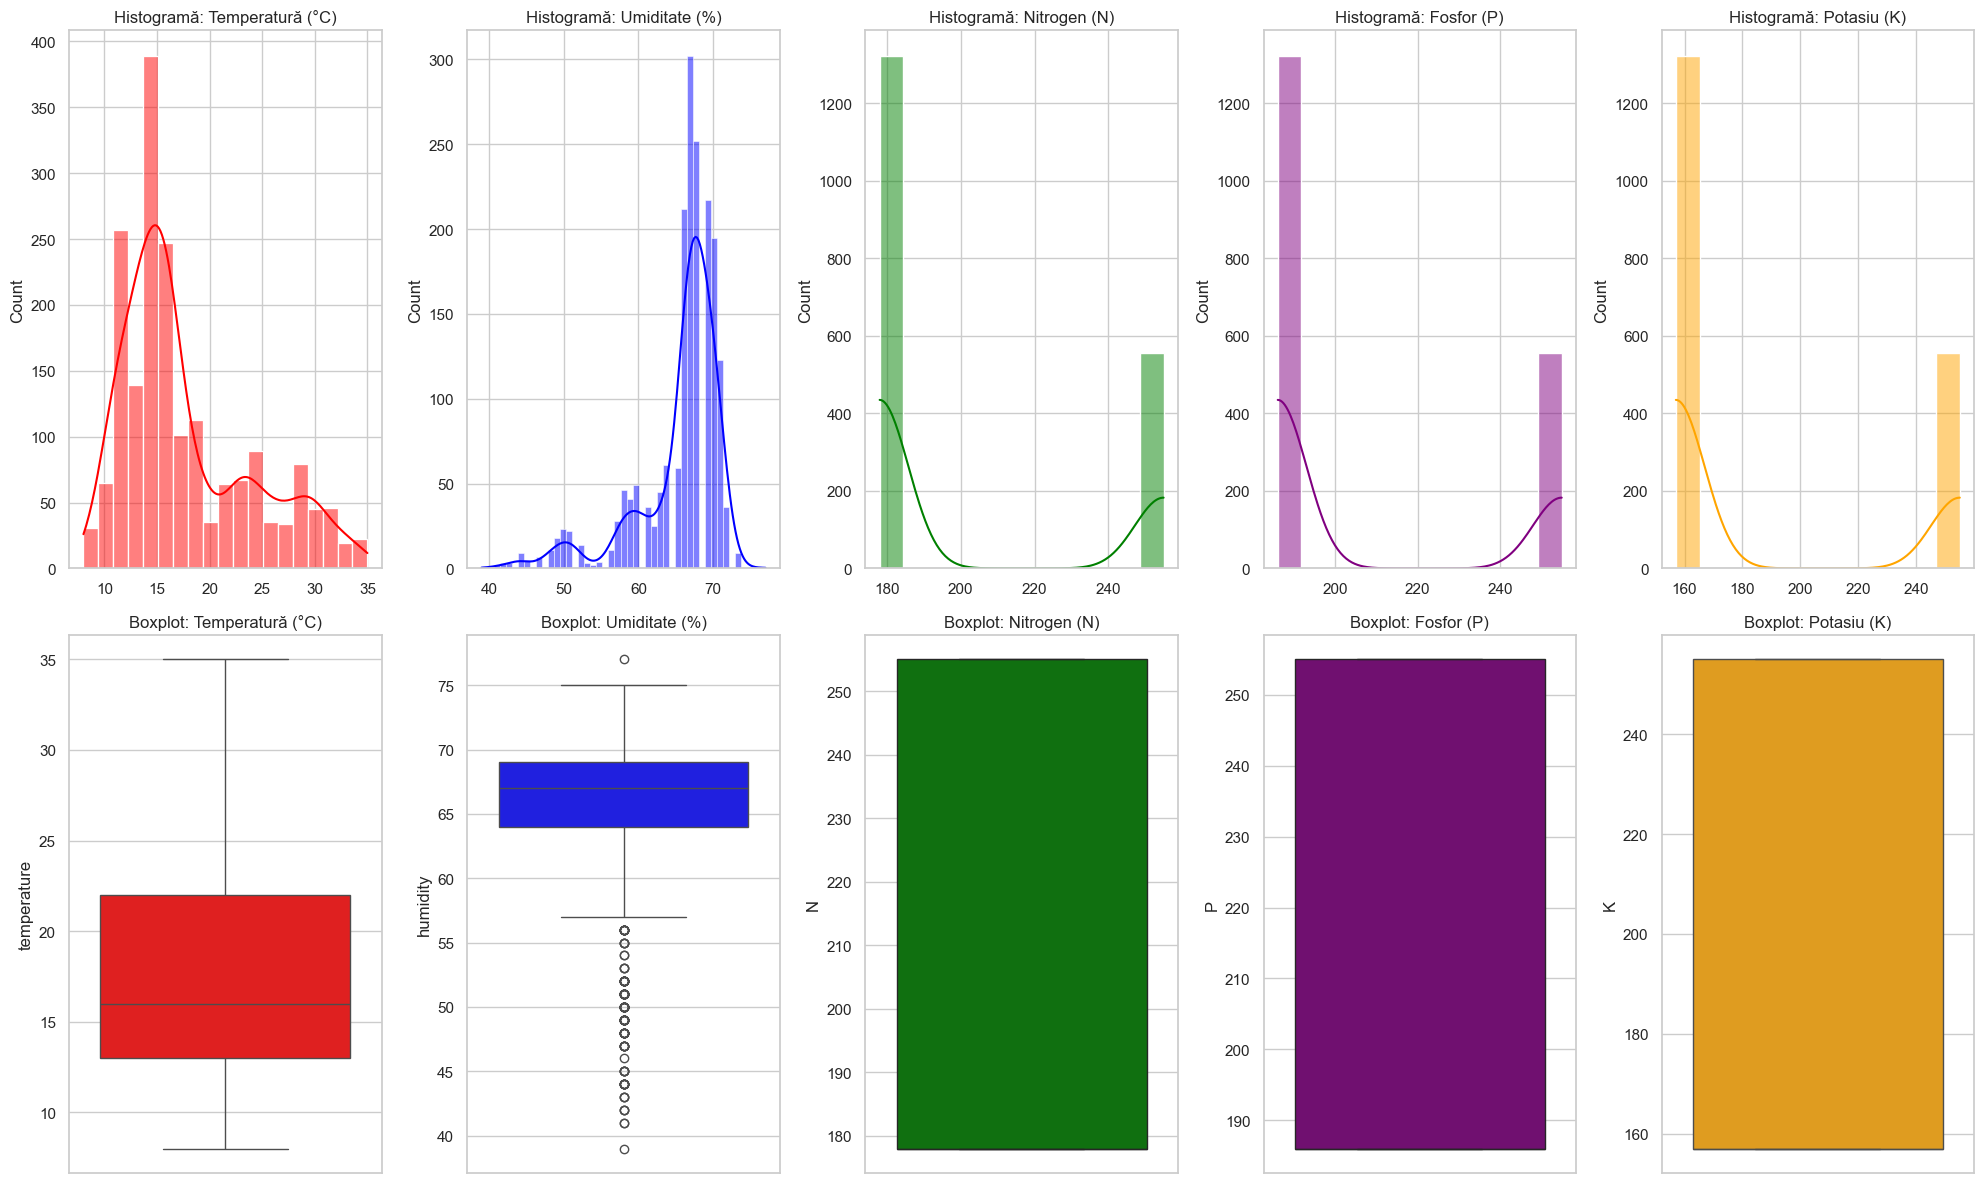

In [39]:
# Setarea stilului pentru grafice
sns.set(style="whitegrid")

# Crearea graficelor de linie pentru fiecare variabilă
fig, axs = plt.subplots(5, 1, figsize=(14, 30), sharex=True)

variables = ['temperature', 'humidity', 'N', 'P', 'K']
colors = ['red', 'blue', 'green', 'purple', 'orange']
titles = ['Temperatură (°C)', 'Umiditate (%)', 'Nitrogen (N)', 'Fosfor (P)', 'Potasiu (K)']

for i, var in enumerate(variables):
    sns.lineplot(x='date', y=var, data=df_week, ax=axs[i], marker='o', color=colors[i])
    axs[i].set_title(titles[i])
    axs[i].set_ylabel(var)
    axs[i].set_xlabel("")

plt.xlabel("Dată și Oră")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crearea histogramelor și boxplot-urilor pentru fiecare variabilă
fig, axs = plt.subplots(2, 5, figsize=(20, 12))

for i, var in enumerate(variables):
    # Histogramă
    sns.histplot(df_week[var], kde=True, ax=axs[0, i], color=colors[i])
    axs[0, i].set_title(f"Histogramă: {titles[i]}")
    axs[0, i].set_xlabel("")
    
    # Boxplot
    sns.boxplot(y=df_week[var], ax=axs[1, i], color=colors[i])
    axs[1, i].set_title(f"Boxplot: {titles[i]}")
    axs[1, i].set_xlabel("")

plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6066

    accuracy                           1.00      6066
   macro avg       1.00      1.00      1.00      6066
weighted avg       1.00      1.00      1.00      6066



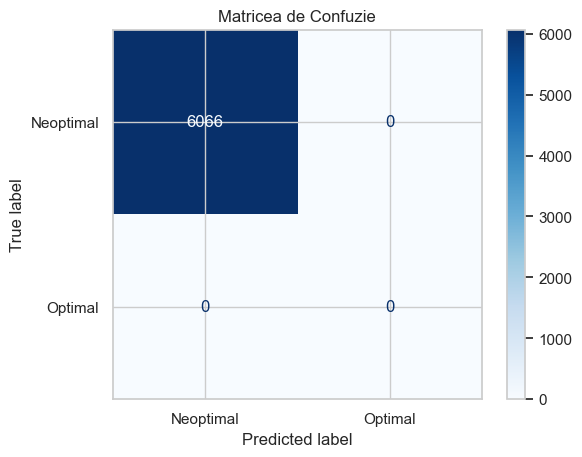

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Definirea variabilelor independente și dependente
X = df[['temperature', 'humidity', 'N', 'P', 'K']]
y = df['optimal_condition']

# Împărțirea datelor în seturi de antrenament și testare (80% antrenament, 20% testare)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scalarea datelor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Antrenarea modelului
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prezicerea pe setul de testare
y_pred = model.predict(X_test_scaled)

# Afișarea raportului de clasificare
print(classification_report(y_test, y_pred))

# Definirea etichetelor posibile
labels = ['Neoptimal', 'Optimal']

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Crearea și afișarea matricei de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Matricea de Confuzie')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6066

    accuracy                           1.00      6066
   macro avg       1.00      1.00      1.00      6066
weighted avg       1.00      1.00      1.00      6066



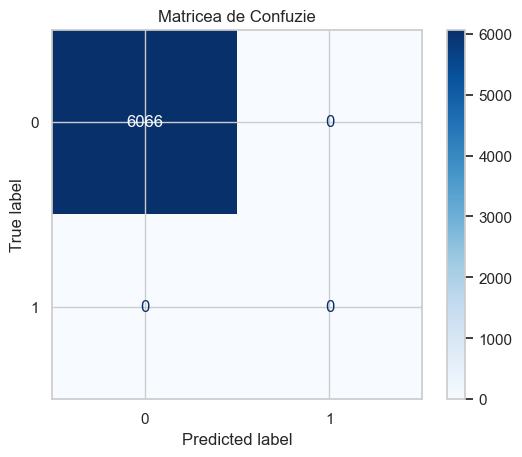

In [49]:
# Importarea bibliotecilor necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Definirea funcției pentru a determina condițiile optime
def is_optimal(row):
    if (20 <= row['temperature'] <= 25 and
        60 <= row['humidity'] <= 80 and
        50 <= row['N'] <= 150 and
        30 <= row['P'] <= 100 and
        100 <= row['K'] <= 200):
        return 1  # Condiții optime
    else:
        return 0  # Condiții neoptime

# Aplicarea funcției asupra DataFrame-ului
df['optimal_condition'] = df.apply(is_optimal, axis=1)

# Selectarea caracteristicilor și a etichetei
X = df[['temperature', 'humidity', 'N', 'P', 'K']]
y = df['optimal_condition']

# Împărțirea datelor în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Antrenarea modelului Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prezicerea pe setul de testare
y_pred = model.predict(X_test)

# Afișarea raportului de clasificare
print(classification_report(y_test, y_pred))

# Definirea etichetelor posibile
labels = [0, 1]

# Calcularea matricei de confuzie
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Crearea și afișarea matricei de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Matricea de Confuzie')
plt.show()


In [55]:
import pandas as pd

# Încărcarea datelor preprocesate
df = pd.read_csv('preprocessed_greenhouse_data.csv')

# Selectarea primei săptămâni din luna ianuarie 2024
start_date = '2024-01-01'
end_date = '2024-01-07'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df_week = df.loc[mask].reset_index(drop=True)

# Definirea funcției de verificare a condițiilor optime
def is_optimal(row):
    if (20 <= row['temperature'] <= 25 and
        60 <= row['humidity'] <= 80 and
        50 <= row['N'] <= 150 and
        30 <= row['P'] <= 100 and
        100 <= row['K'] <= 200):
        return 1  # Condiții optime
    else:
        return 0  # Condiții neoptime

# Aplicarea funcției pentru a determina condițiile optime
df_week['optimal_condition'] = df_week.apply(is_optimal, axis=1)

# Definirea funcției pentru activarea/dezactivarea actuatoarelor
def control_actuators(row):
    # Inițializarea unui dicționar pentru valori implicite (totul oprit)
    actuators = {
        'Fan_actuator_OFF': 1,
        'Fan_actuator_ON': 0,
        'Watering_plant_pump_OFF': 1,
        'Watering_plant_pump_ON': 0,
        'Water_pump_actuator_OFF': 1,
        'Water_pump_actuator_ON': 0
    }

    # Logica pentru ventilator (Fan_actuator)
    if row['temperature'] < 20:  # Temperatură prea scăzută, ventilator oprit
        actuators['Fan_actuator_OFF'] = 1
        actuators['Fan_actuator_ON'] = 0
    elif 20 <= row['temperature'] <= 25:  # Temperatură ideală, ventilator oprit
        actuators['Fan_actuator_OFF'] = 1
        actuators['Fan_actuator_ON'] = 0
    else:  # Temperatură prea mare, ventilator pornit
        actuators['Fan_actuator_OFF'] = 0
        actuators['Fan_actuator_ON'] = 1

    # Logica pentru pompa de apă (Watering_plant_pump)
    if row['humidity'] < 60:  # Umiditate prea scăzută, pornește pompa
        actuators['Watering_plant_pump_OFF'] = 0
        actuators['Watering_plant_pump_ON'] = 1
    elif 60 <= row['humidity'] <= 80:  # Umiditate ideală, nu este nevoie de apă
        actuators['Watering_plant_pump_OFF'] = 1
        actuators['Watering_plant_pump_ON'] = 0
    else:  # Umiditate prea mare, oprește pompa
        actuators['Watering_plant_pump_OFF'] = 1
        actuators['Watering_plant_pump_ON'] = 0

    # Logica pentru pompa de apă pentru sol (Water_pump_actuator)
    if row['N'] < 50 or row['P'] < 30 or row['K'] < 100:  # Nivele scăzute de nutrienți
        actuators['Water_pump_actuator_OFF'] = 0
        actuators['Water_pump_actuator_ON'] = 1
    else:  # Nivele suficiente de nutrienți
        actuators['Water_pump_actuator_OFF'] = 1
        actuators['Water_pump_actuator_ON'] = 0

    return actuators

# Aplicarea funcției pentru a actualiza actuatoarele în dataframe
df_week[['Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF', 
    'Watering_plant_pump_ON', 'Water_pump_actuator_OFF', 'Water_pump_actuator_ON']] = df_week.apply(control_actuators, axis=1, result_type="expand")

# Verificarea primelor linii pentru a vedea dacă s-au actualizat corect actuatoarele
print(df_week[['date', 'temperature', 'humidity', 'N', 'P', 'K', 'Fan_actuator_ON', 'Watering_plant_pump_ON', 'Water_pump_actuator_ON']].head())

# Vizualizarea rezultatelor finale
print(df_week[['date', 'temperature', 'humidity', 'N', 'P', 'K', 'optimal_condition', 'Fan_actuator_ON', 'Watering_plant_pump_ON', 'Water_pump_actuator_ON']])

# Opțional: Salvarea unui fișier cu rezultatele finale
df_week.to_csv('greenhouse_actuator_controls.csv', index=False)


                  date  temperature  humidity    N    P    K  Fan_actuator_ON  \
0  2024-01-01 00:01:00           19        70  178  186  157                0   
1  2024-01-01 00:06:00           21        69  178  186  157                0   
2  2024-01-01 00:11:00           22        68  178  186  157                0   
3  2024-01-01 00:16:00           23        71  178  186  157                0   
4  2024-01-01 00:21:00           23        67  178  186  157                0   

   Watering_plant_pump_ON  Water_pump_actuator_ON  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  
                     date  temperature  humidity    N    P    K  \
0     2024-01-01 00:01:00           19        70  178  186  157   
1     2024-01-01 00:06:00           21        69  178  186  157   


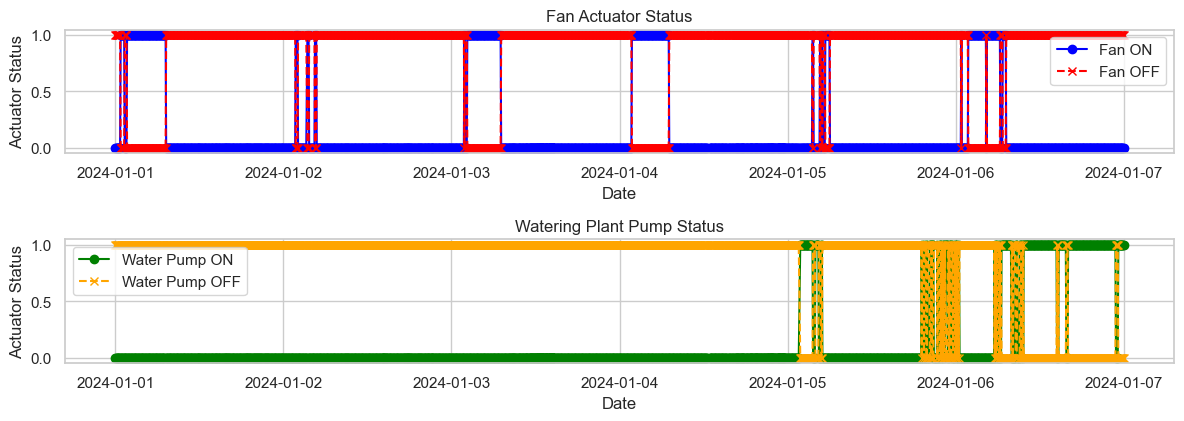

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Grafic pentru a urmări activarea actuatoarelor
plt.figure(figsize=(12, 6))

# Grafic pentru ventilator
plt.subplot(3, 1, 1)
plt.plot(pd.to_datetime(df_week['date']), df_week['Fan_actuator_ON'], label='Fan ON', color='blue', linestyle='-', marker='o')
plt.plot(pd.to_datetime(df_week['date']), df_week['Fan_actuator_OFF'], label='Fan OFF', color='red', linestyle='--', marker='x')
plt.title('Fan Actuator Status')
plt.xlabel('Date')
plt.ylabel('Actuator Status')
plt.legend()

# Grafic pentru pompa de apă
plt.subplot(3, 1, 2)
plt.plot(pd.to_datetime(df_week['date']), df_week['Watering_plant_pump_ON'], label='Water Pump ON', color='green', linestyle='-', marker='o')
plt.plot(pd.to_datetime(df_week['date']), df_week['Watering_plant_pump_OFF'], label='Water Pump OFF', color='orange', linestyle='--', marker='x')
plt.title('Watering Plant Pump Status')
plt.xlabel('Date')
plt.ylabel('Actuator Status')
plt.legend()

# Afișarea graficelor
plt.tight_layout()
plt.show()
